<H2> 1. Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt
import pandas_datareader as pdr
import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns

#To make our plots nicer
sns.set(style="darkgrid",context="talk", palette="Dark2")

import statsmodels.api as sm
import pandas_datareader.data as web
from datetime import datetime
import math
import yfinance as yf
import random as rd
from scipy.stats import norm

C:\Users\henri\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


<H2> 2. Import our different stocks and their data

In [2]:
#Setting the start and end date
start="2010-01-01"
end="2023-04-01"

#Selecting our stocks ticker
ticker=["MSFT","TSLA", "AMZN","MCD", "COST"]

#Extracting all the data
df=yf.download(ticker, start, end)

#Renaming the columns
df.rename(columns={"Adj Close":"AdjC"}, inplace=True)

#Creating the final DF with only the adjusting closing price
df=df["AdjC"]

#Take a look at what we are working with
df

[*********************100%***********************]  5 of 5 completed


,AMZN,COST,MCD,MSFT,TSLA
Date,,,,,
2010-01-04,6.695000,43.761387,42.994114,23.572372,NaN
2010-01-05,6.734500,43.628792,42.665386,23.579983,NaN
2010-01-06,6.612500,44.195969,42.083267,23.435280,NaN
2010-01-07,6.500000,43.982353,42.391445,23.191553,NaN
2010-01-08,6.676000,43.665623,42.350357,23.351496,NaN
...,...,...,...,...,...
2023-03-27,98.040001,492.193420,272.394073,275.777130,191.809998
2023-03-28,97.239998,485.756836,274.393494,274.629669,189.190002
2023-03-29,100.250000,489.848297,275.975067,279.898132,193.880005


In [3]:
#Dropping the rows which contains NaN values
df=df.dropna()
df

,AMZN,COST,MCD,MSFT,TSLA
Date,,,,,
2010-06-29,5.430500,41.244148,46.286816,17.917034,1.592667
2010-06-30,5.463000,40.651031,45.875923,17.686445,1.588667
2010-07-01,5.548000,40.702915,46.460945,17.801739,1.464000
2010-07-02,5.457000,40.206184,46.063961,17.886292,1.280000
2010-07-06,5.503000,40.035667,46.043072,18.309046,1.074000
...,...,...,...,...,...
2023-03-27,98.040001,492.193420,272.394073,275.777130,191.809998
2023-03-28,97.239998,485.756836,274.393494,274.629669,189.190002
2023-03-29,100.250000,489.848297,275.975067,279.898132,193.880005


<H2>3.1 Aritmethic and Logarithmic Return for the stocks

In [4]:
#The Aritmethic return for the stocks

#Using the built-in function pct.change()
arit_return=df.pct_change()

#Dropping rows which containts NaN
arit_return=arit_return.dropna()

#Returns the first five rows
arit_return.head()

,AMZN,COST,MCD,MSFT,TSLA
Date,,,,,
2010-06-30,0.005985,-0.014381,-0.008877,-0.012870,-0.002511
2010-07-01,0.015559,0.001276,0.012752,0.006519,-0.078473
2010-07-02,-0.016402,-0.012204,-0.008544,0.004750,-0.125683
2010-07-06,0.008430,-0.004241,-0.000453,0.023636,-0.160937
2010-07-07,0.030620,0.005370,0.018151,0.020151,-0.019243


In [5]:
#The natural Logarithmic return

#Using the np.log combines with the diff-function (first take the logarithmic value and then the difference)
log_return=np.log(df).diff()

#Dropping the rows with NaN
log_return=log_return.dropna()

#Returns the first five rows
log_return.head()

,AMZN,COST,MCD,MSFT,TSLA
Date,,,,,
2010-06-30,0.005967,-0.014485,-0.008917,-0.012953,-0.002515
2010-07-01,0.015439,0.001276,0.012672,0.006498,-0.081723
2010-07-02,-0.016538,-0.012279,-0.008581,0.004738,-0.134312
2010-07-06,0.008394,-0.004250,-0.000454,0.023361,-0.175470
2010-07-07,0.030160,0.005355,0.017989,0.019951,-0.019431


<H3> 3.2 Cumulative and Relative Return

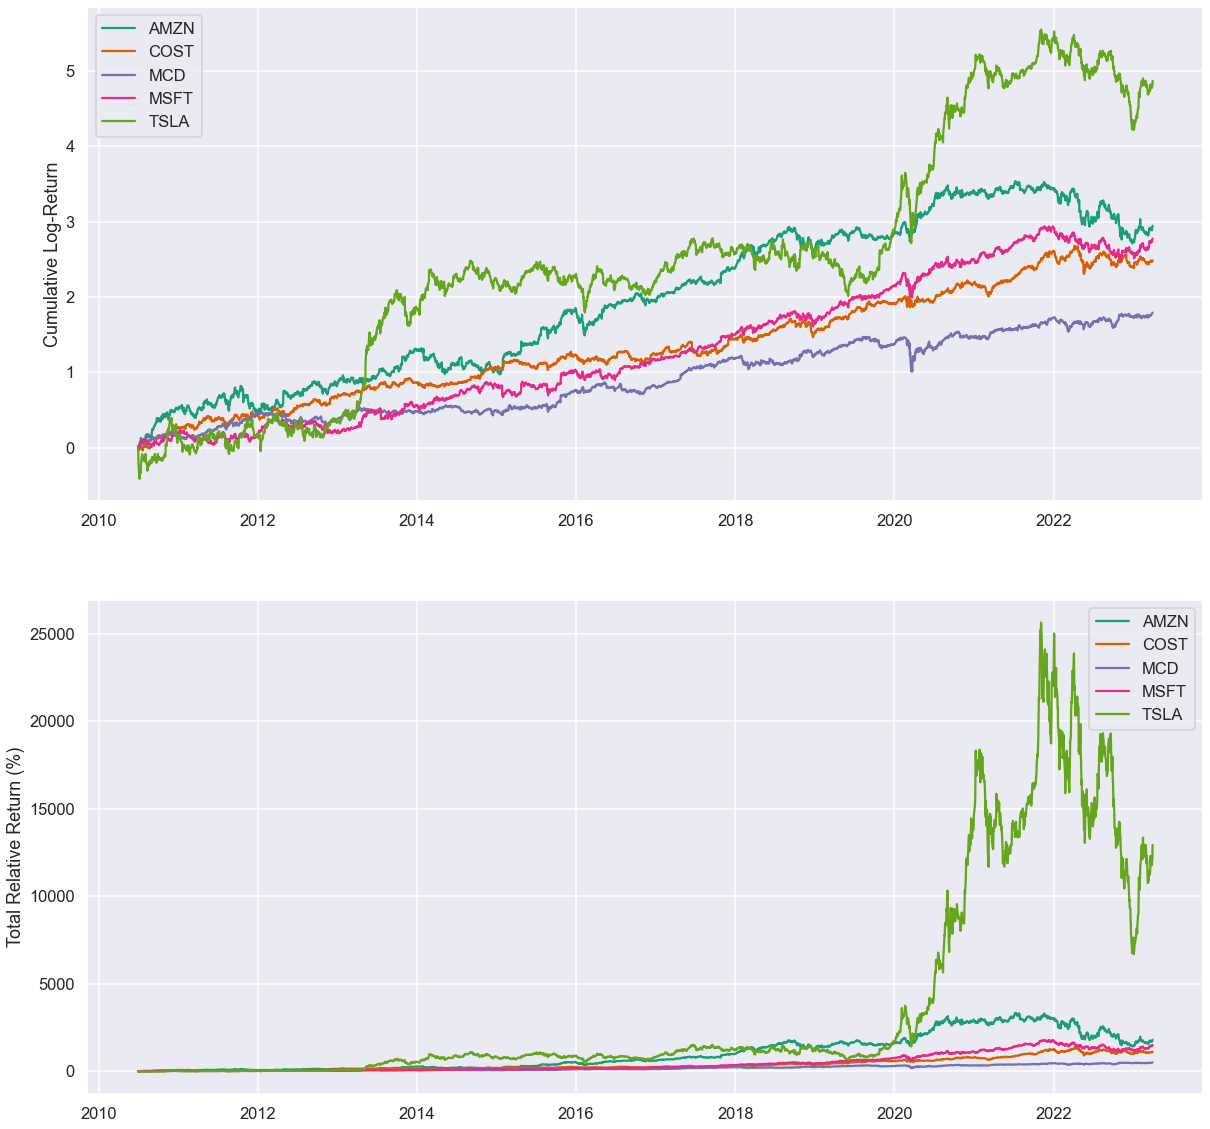

In [6]:
fig, (ax1, ax2)=plt.subplots(2,1, figsize=(20,20)) #Four axis distributed on four rows

#For the logarithmic return, each stock will be plotted with log-return
for i in log_return:
    ax1.plot(log_return.index, log_return[i].cumsum(), label=str(i))
ax1.set_ylabel("Cumulative Log-Return")
ax1.legend(loc="best")
ax1.grid(True)

for i in log_return:
    ax2.plot(log_return.index, 100*(np.exp(log_return[i].cumsum())-1), label=str(i))
ax2.set_ylabel("Total Relative Return (%)")
ax2.legend(loc="best")
ax2.grid(True)


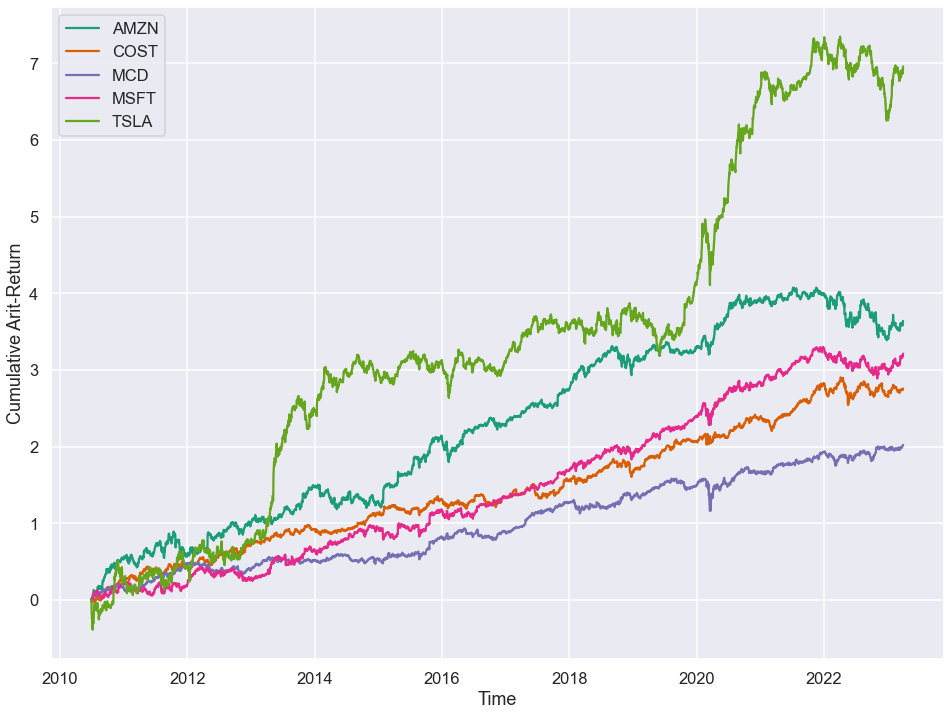

In [7]:
#For the Arithmetic return for each stock visualized
fig,ax=plt.subplots(1, figsize=(16,12))
for ticker in arit_return:
    ax.plot(arit_return.index, arit_return[ticker].cumsum(), label=str(ticker))

ax.set_ylabel("Cumulative Arit-Return")
ax.set_xlabel("Time")
ax.legend(loc="best")
ax.grid(True)

<H2>4.1 Introduction to Efficient Frontier and Markowitz portfolio optimization

In this part of the project we will take a look a the theory behind an *Efficient Frontier*. This theory is inspired by the subject "Financial Modeling using Excel", and is based on the theory from **Markowitz Portfolio Optimization**.

First of all, lets go thorugh the necessary elements in a portfolio:
- A portfolio is efficient if there is no portfolio with the same risk ($\sigma$) but a higher return ($\mu$) or if there is no portfolio with the same return ($\mu$) but a lower risk ($\sigma$) 


We can find efficient portfolios by:
1. **Minimizing** the risk ($\sigma$) subject to a given **target** mean **return** ($\mu$)
2. **Maximizing** the mean return ($\mu$) subject to **maximum allowable risk** ($\sigma$)


These two concepts is the idea behind the Markowitz Portfolio Optimization. Next step will be to present the calculation/notation behind our expected return for a given portfolio ($\mu$) and its formula for standard devation ($\sigma$).This is an multi-asset portfolio where *w* is notated for the given weight of an asset and *i* is the number of asset:
- The formula for the portfolio expected return: $\mu_{p}=\sum\limits_{i=1}^{N} w_{i}*\mu_{i}$
- The formula for the portfolio standard deviation:$\sigma_{p}=\sqrt{\sum^N_{i=1}\sum^N_{j=1}w_{i}*w_{j}*\sigma_{i,j}}$



As we can see by the formula above, the return for our portfolio is defined as the weighted sum of the returns of the assets in the portfolio. It is worth noting that the standard deviation for our portfolio contains the covariance between every asset within the portfolio. 


**Matrix Notation**


We could rewrite these formulas into a more technical way, by presenting these as vectors/matrixes:
- *Expected return*
    - $\mu_{p}=\mu*W^{T}$
    - Where the **$\mu$** and **W** are row vectors:$\mu= (\mu_{1} ....\mu_{N})$ and $W= (W_{1} ....W_{N})$ 
    - The *T* indicates that this row has been tranposed 

- *Portfolio Variance*
    - $\sigma^{2}_{p}=W*C*W^{T}$
    
    - $\sigma_{p}=\sqrt{\sigma^{2}_{p}}$
    - The difference here is that we introduce the *The Covariance Matrix* in our calculations
    
    

Now that we have the basis for the theory behind Markowitz Portfolio Optimization and an explanation of all the notations, we can now start to build our portfolio in the next part.

<H3>4.2 Computing expected return from a random weighted portfolio

In [8]:
#Random weights in a list
rd_weight=[0.2, 0.2, 0.1, 0.25, 0.25]

#Using the dot-function (vector multiplication) and then the output will be multiplied with 100 in order to present as %
rd_portfolio=arit_return.dot(rd_weight)*100

#Convert the output array into a more presentable dataframe
rd_portfolio_return=pd.DataFrame(rd_portfolio)

#Renaming the column from "0" into a more reasonable name
rd_portfolio_return=rd_portfolio_return.rename(columns={0:"Port_R%"})

#See the five first rows
rd_portfolio_return.head()

,Port_R%
Date,
2010-06-30,-0.641222
2010-07-01,-1.334616
2010-07-02,-3.680902
2010-07-06,-3.353311
2010-07-07,0.924007


Now that we have computed the *expected return* for our portfolio, the next step would be to introduce the risk presented as our standard deviation.

<H3> 4.3 Risk associated with Asset and portfolio

The natural steps for this part are:
- Calculate the covariance matrix on the returns data
- Annualize the covariance by multiplying by 252 (there are 252 active trading days in a calenderyear)
- Compute the square root of the vector multiplication of covariance matrix and the weight vectors

In [9]:
#Covariance for the return dataframe
cov_matrix=arit_return.cov()*252
cov_matrix

,AMZN,COST,MCD,MSFT,TSLA
AMZN,0.109268,0.028070,0.018804,0.049059,0.066997
COST,0.028070,0.042246,0.015588,0.026795,0.029699
MCD,0.018804,0.015588,0.036101,0.022562,0.026382
MSFT,0.049059,0.026795,0.022562,0.068402,0.053116
TSLA,0.066997,0.029699,0.026382,0.053116,0.329360


The diagonal elements of our covariance matric represent the variance of each asset, while the off-diagonal terms represent the covariance between two assets.

To compute the portfolio risk is as shown:

In [10]:
#Computing the portfolio variance. The "@" indicates matrix_multiplication
portfolio_var=np.transpose(rd_weight)@cov_matrix@rd_weight

#Computing portfolio standard deviation, aka Risk
portfolio_STD=np.sqrt(portfolio_var)

print(f"The standard deviation of our random weighted portfolio is: {portfolio_STD}")

The standard deviation of our random weighted portfolio is: 0.2474768015454609


<H2> 5.1 Markowitz Portfolio Optimization

Now we will apply what we have done above in order to create a number of different random portfolios. In the end we will have created a efficient portfolio "cloud", and will find the frontier of this cloud. As explained above we have two ways to create an optimized portfolio based on the Markowitz approach:

**1. Maximize the expected return for a given standard deviation**. This can be formulated as:

**Max**: $\mu_{p}=\sum\limits_{i=1}^{N} w_{i}*\mu_{i}$

**Subject to**:
- $\sqrt{\sum^N_{i=1}\sum^N_{j=1}x_{i}*x_{j}*\sigma_{i,j}} <= \hat{\sigma}_{p}$
- $\sum\limits_{i=1}^{N} w_{i}=1$
- $w_{i}>=0$ for all i (No short positions)

*Explanation*: We want to maximize our expected return for this portolio, constrained to a given standard deviation, all our weights should sum up to 1 and no short position is allowed.

**2. Minimize the risk (standard deviation) for a given expected return**. This can be formulated as: 

**Min**:$\sqrt{\sum^N_{i=1}\sum^N_{j=1}w_{i}*w_{j}*\sigma_{i,j}}$

**Subject to**:
- $\sum\limits_{i=1}^{N} w_{i}*\mu_{i} >= \hat{\mu}_{p}$
- $\sum\limits_{i=1}^{N} w_{i}=1$
- $w_{i}>=0$ for all i (No short positions)

*Explanation*: We want to minimize the standard deviation for the portfolio, constrained to a given return we want at least, all our weights should sum up to 1 and no short position are allowed.



Our *Max* and *Min* are our objective functions and the rest represent the constraints in our optimization problem. Next step would be to generate our "Portfolio Cloud".

<H3> 5.2 Creating Portfolio Cloud

In this part we want to create our portfolio cloud, which is our efficient frontier. In each loop we consider a randomly allocated unique set of weigfhts for the assets in our portfolio and caluculate the excpected return and standard deviation for this combination of weights. At the end we want to visualize this portfolio cloud.

In [11]:
#Creating an empty list to store the simulated returns for the different portfolios
port_return=[]

#Creating an empty list to store the standard deviation for the different portfolios
port_std=[]

#Creating an empyt list to store the allocated weights for the different stocks in the portfolio
port_weights=[]

n_assets=len(arit_return.columns)
m= 10000                        #Number of portfolios we wan to create


#Computing the individualannually stock return (as shown based on the OG df)
stock_return=df.resample("Y").last().pct_change().mean()   #Resample into annually return and take the mean of all these years

In [12]:
#Creating our loop for the simulations

for port in range(m):
    #Weights randomely generated
    weights=np.random.random(n_assets)
    #Normalize the weights in order to sum up to 1
    weights=weights/np.sum(weights)
    port_weights.append(weights)
    #Returns are the dot product of individual return of stock and its allocated weights
    returns=np.dot(weights, stock_return)
    port_return.append(returns)
    
    #Computing the Portfolio Std
    var=cov_matrix.mul(weights,axis=0).mul(weights, axis=1).sum().sum()
    #Daily standard deviation
    std=np.sqrt(var)
    #Annualize the std
    annual_std=std*np.sqrt(250)
    port_std.append(annual_std)

The next step would be to aggregate the data into a dictionary and then create a dataframe to see the weight combination for the assets and their corresponding returns and standard deviation volatility

In [13]:
#Creating the dictionary of returns and standard deviation
data= {"Return": port_return, "Risk/Std": port_std}

#Creating the columns into "ticker+Weight"
for counter,symbol in enumerate(df.columns.tolist()):
    data[symbol+"weight"]=[w[counter] for w in port_weights]

In [14]:
#Converting the dictionary data into a more presentable dataframe
port_cloud=pd.DataFrame(data)
port_cloud.head()

,Return,Risk/Std,AMZNweight,COSTweight,MCDweight,MSFTweight,TSLAweight
0,0.553811,4.935220,0.150259,0.014148,0.294205,0.094458,0.446930
1,0.277341,3.177756,0.147021,0.022011,0.388872,0.351503,0.090593
2,0.443080,3.975418,0.113663,0.147612,0.246840,0.189657,0.302228
3,0.456963,4.272459,0.266880,0.146282,0.056089,0.243358,0.287391
4,0.487270,4.599079,0.210578,0.050025,0.006227,0.414867,0.318303


Now we can visualize the efficient frontier that we have created, in other words we plot the "portfolio cloud":

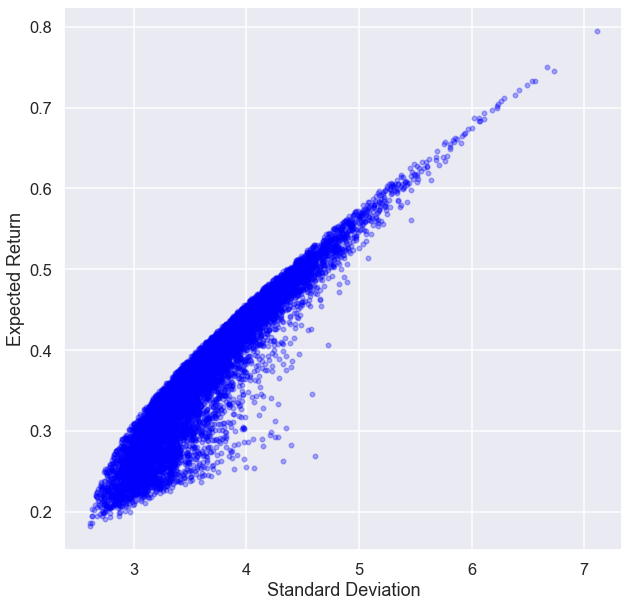

In [15]:
#Plot the portfolio cloud
port_cloud.plot.scatter(x="Risk/Std", y="Return", marker="o", color="blue", 
                       alpha=0.3, grid=True, figsize=[10,10])

plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.show()

<H3> 5.3 Markowitz Optimization

<H4> 5.3.1 Minimum Volatility (Minimize standard devation)

In [16]:
#Minimum Standard deviation, the "idxmin function" returns the minimum value for the standard devation
min_std_port=port_cloud.iloc[port_cloud["Risk/Std"].idxmin()]
min_std_port

Return        0.182783
Risk/Std      2.609909
AMZNweight    0.032006
COSTweight    0.459315
MCDweight     0.445970
MSFTweight    0.059181
TSLAweight    0.003528
Name: 451, dtype: float64

<H4> 5.3.2 Highest Sharpe Ratio

The sharp-ratio is the average return earned in excess of ther risk-free rate per unit of standard deviation. The formula is as follows:
- $Sharpe Ratio=(R_{P}-R_{f})/ STD_{p}$

In [21]:
#Since the formula includes a risk-free rate , we select a random level of risk-free rate we can minimum receive in the bank
rf=0.01

#Extract the optimal portfolio given the highest value of sharp-ratio
Sharp_ratio_port=port_cloud.iloc[(port_cloud["Return"]-rf/port_cloud["Risk/Std"]).idxmax()]
Sharp_ratio_port

Return        0.794263
Risk/Std      7.114157
AMZNweight    0.025462
COSTweight    0.045977
MCDweight     0.118120
MSFTweight    0.057555
TSLAweight    0.752886
Name: 2897, dtype: float64

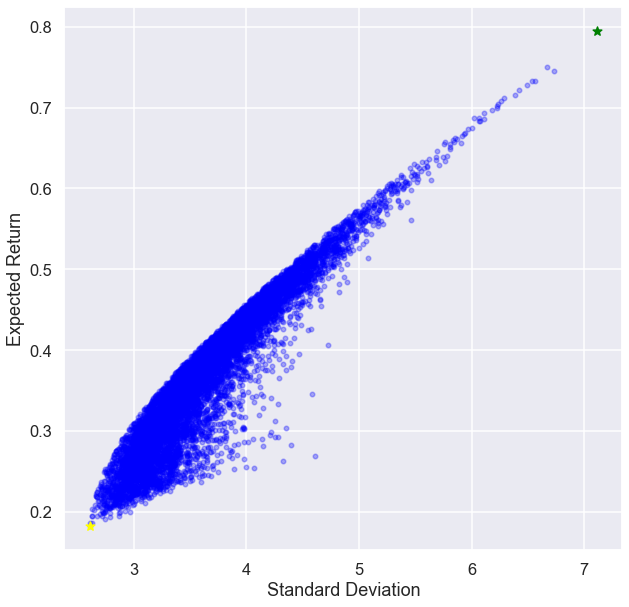

In [22]:
#Next thing would be to visualize these two portfolios in our cloud

#Plot the portfolio cloud
port_cloud.plot.scatter(x="Risk/Std", y="Return", marker="o", color="blue", 
                       alpha=0.3, grid=True, figsize=[10,10])

#Minimum Std Portfolio, element [1] is our standard devation value and element [0] is the expt.return
plt.scatter(min_std_port[1], min_std_port[0], c="yellow", marker="*")

#Sharpe Ratio max
plt.scatter(Sharp_ratio_port[1], Sharp_ratio_port[0], c="g", marker="*")


plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.show()